# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


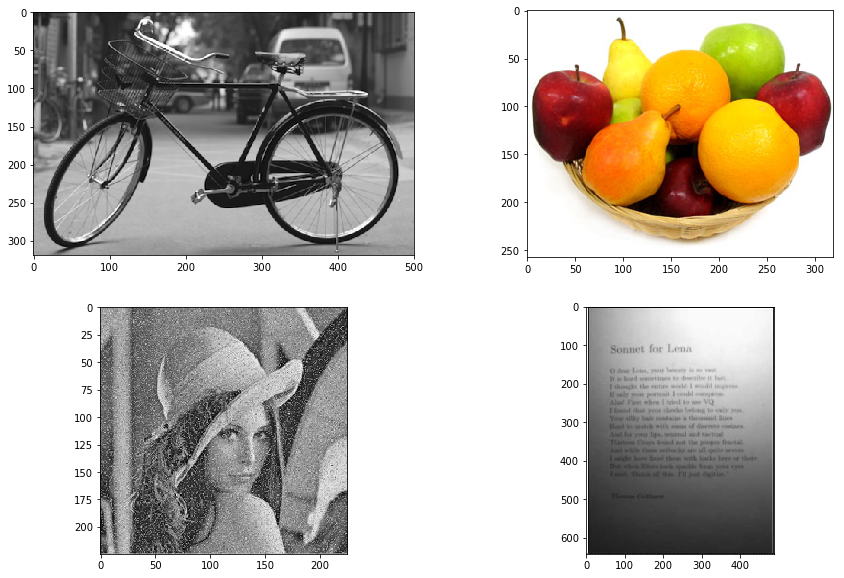

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


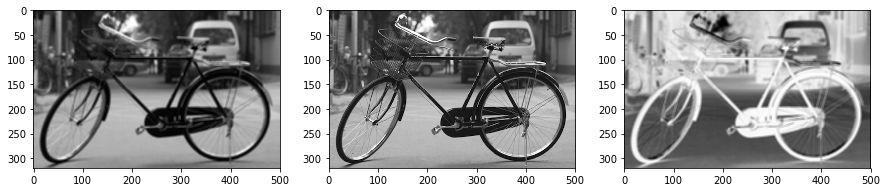

In [2]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')


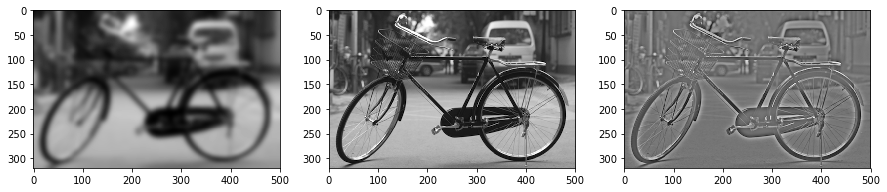

In [3]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

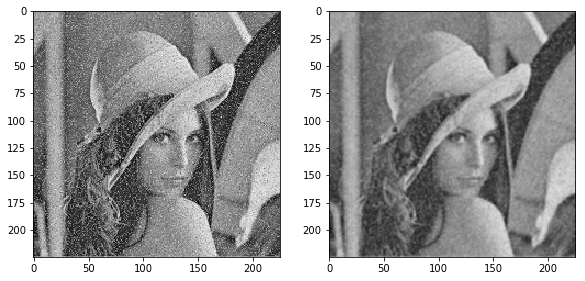

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
imlen = img.imread('./lena.jpg')
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imlen, sigma=0.8)
#ex = imlen
#noisy = ex + 0.4 * ex.std() * np.random.random(ex.shape)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imlen)

plt.subplot(132)
plt.imshow(gflt)

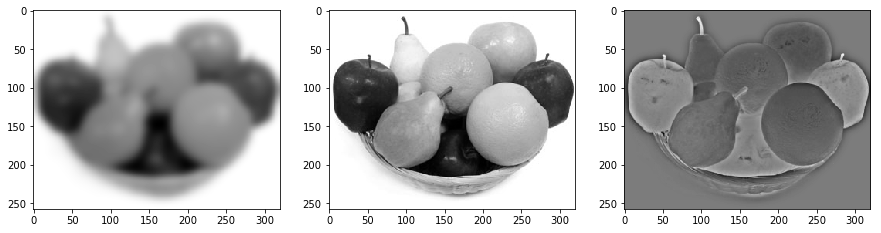

In [9]:
from scipy import ndimage as nimg
import numpy as np
from PIL import Image
from skimage import color
from skimage import io
gflt = nimg.gaussian_filter(imfru, sigma=5)
fig = plt.figure(figsize=(15,10))
imgFruit = color.rgb2gray(imfru)
imGflt =color.rgb2gray(gflt)
#np.dot(np.ones((258,320)), np.ones((258,320,3)))
plt.subplot(131)
plt.imshow(imGflt,cmap='gray')
plt.subplot(132)
plt.imshow(imgFruit,cmap='gray')
plt.subplot(133)
plt.imshow((imGflt - imgFruit),cmap='gray')

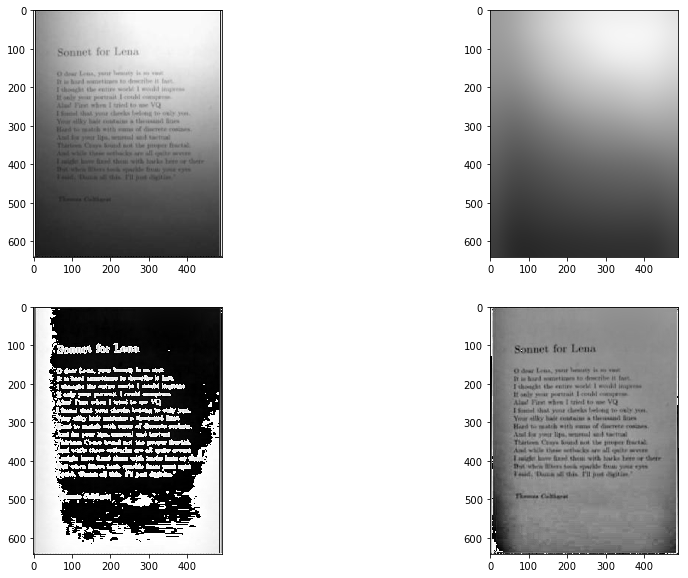

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from math import log
import numpy as np
from numpy import ndarray
from scipy import ndimage as nimg
%matplotlib inline
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
gimbook = nimg.gaussian_filter(imbook, sigma=35)
# Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)G(x, y, sigma)] ,
# where G - gaussian, sigma - coef of blurring, 
# - convolution remapping of image from (-1,1) to (0,255) with I = 255*I + 127

# intenCorr = log[imbook(10, 10)] - log[imbook(10, 10) * gimbook(10, 10)]
# intenCorr = 255 * intenCorr + 127
# intCorr = log[imbook(10, 20)] - log[imbook(10, 20) * gimbook(10, 20, 30)]
# 
# imbook2 = log[imbook(400, 600)] - log[imbook(400, 600) * imbook(400, 600, 30)]

v1 = (imbook - gimbook).max()
v2 = (imbook - gimbook).min()
subtr = np.log2(imbook) - np.log2(gimbook)
cimbook = (subtr - v2) / (v1 - v2)
plt.subplot(221)
plt.imshow(imbook)
plt.subplot(222)
plt.imshow(gimbook)
plt.subplot(223)
plt.imshow(imbook - gimbook)
plt.subplot(224)
plt.imshow(cimbook)